In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

#### Loading Dataset

In [5]:
temp = pd.read_csv(r'C:\Users\ronen\Courses\קורס DA\Python\JupyterFiles\Data\GlobalLandTemperaturesByCity.csv')

#### Cleaning and arranging

In [6]:
temp.drop(columns='AverageTemperatureUncertainty', inplace=True)

In [7]:
temp = temp[temp.AverageTemperature.notna()]

In [8]:
temp['dt'] = pd.to_datetime(temp['dt'])

In [9]:
temp = temp.assign(year=temp['dt'].dt.year,
                   month=temp['dt'].dt.month)
temp = temp.assign(decade=temp['year']//10*10)

#### Comparison Analysis

In [63]:
c1='Rome'
c2='Jerusalem'
c3='Sydney'
ys = 1980
ye = 2013


In [64]:
mask1 = temp.City == c1
mask2 = temp.City == c2
mask3 = temp.City == c3
mask_t = temp.year.between(ys, ye)

In [65]:
temp_new = temp[((mask1)|(mask2)|(mask3)) & (mask_t)]

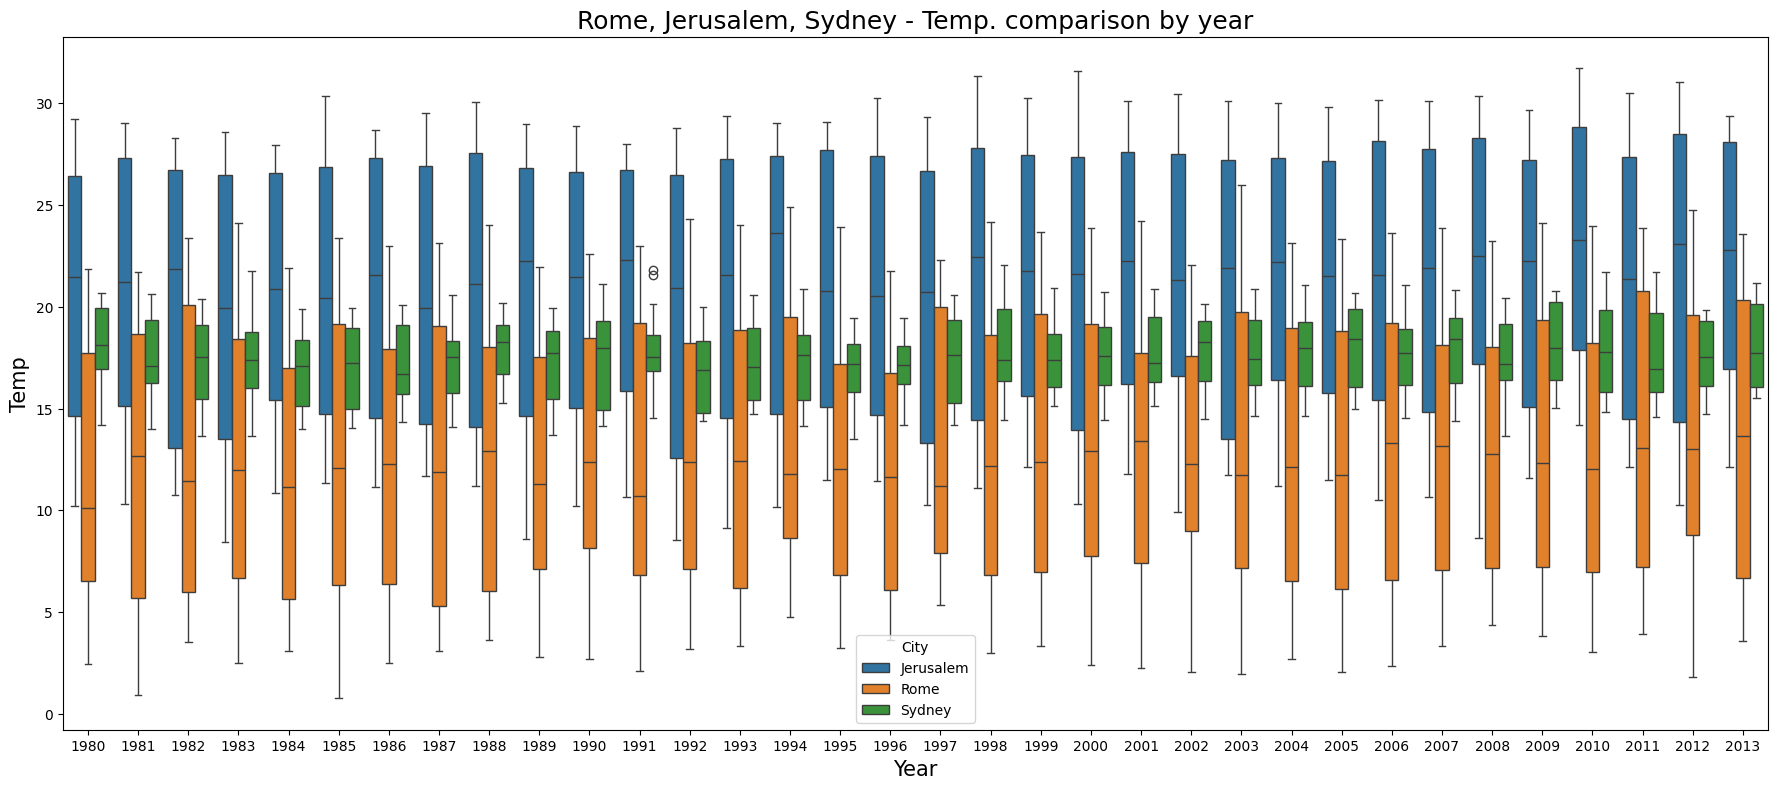

In [66]:
plt.figure(figsize=(22,9))
sb.boxplot(data=temp_new ,x='year', y='AverageTemperature',  hue='City')
plt.title(f'{c1}, {c2}, {c3} - Temp. comparison by year', size=18)
plt.xlabel('Year', size=15)
plt.ylabel('Temp', size=15)
plt.show()

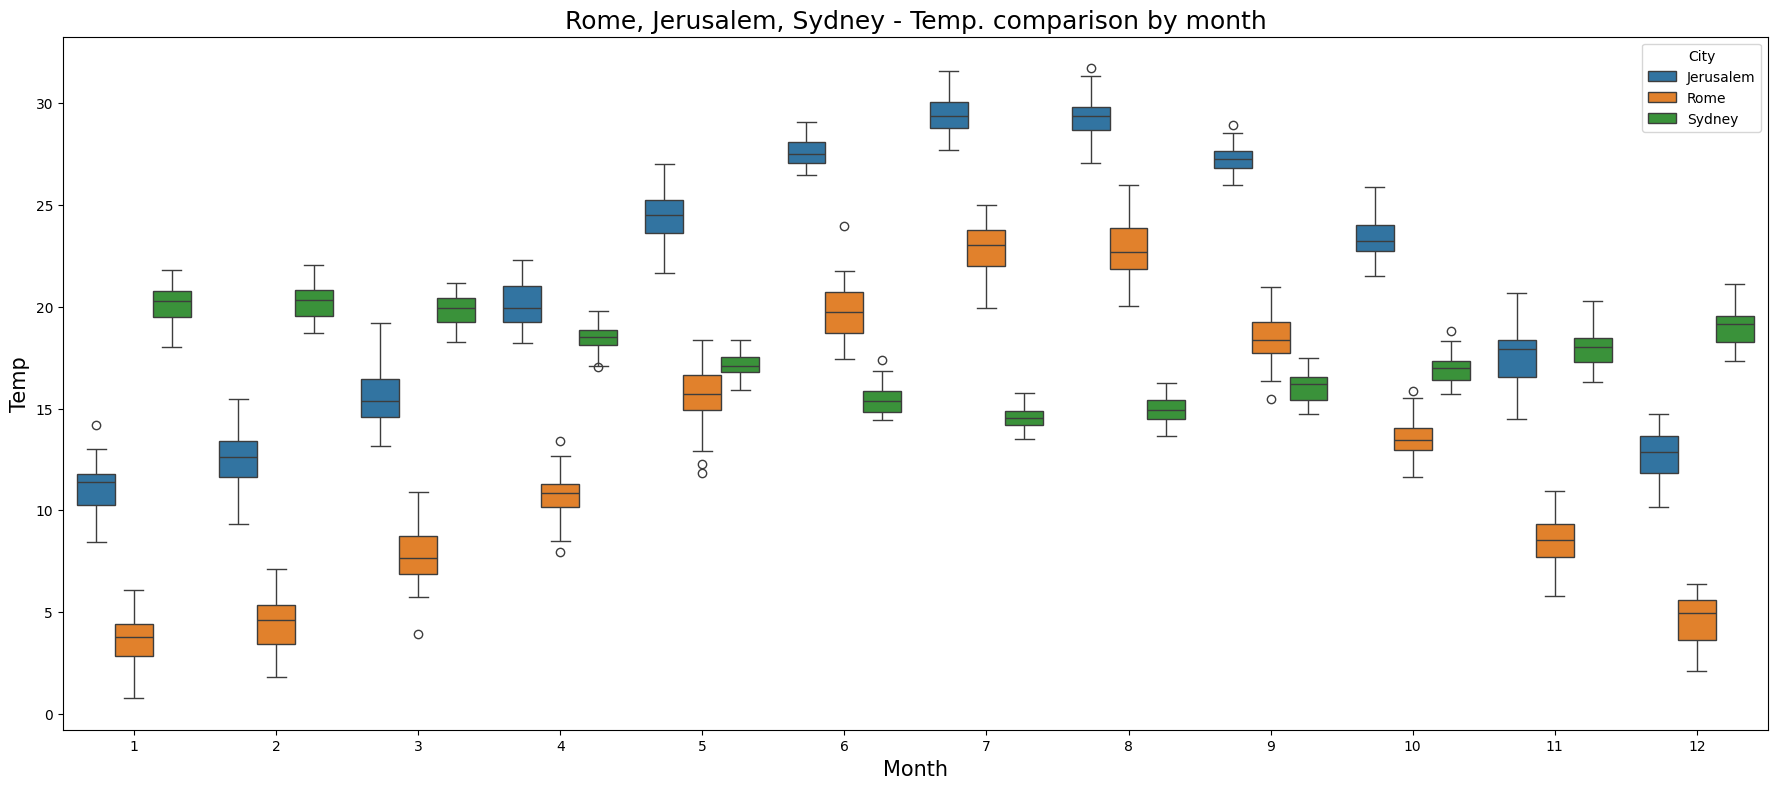

In [67]:
plt.figure(figsize=(22,9))
sb.boxplot(data=temp_new ,x='month', y='AverageTemperature',  hue='City')
plt.title(f'{c1}, {c2}, {c3} - Temp. comparison by month', size=18)
plt.xlabel('Month',size=15)
plt.ylabel('Temp',size=15)
plt.show()

In [68]:
temp_desc = temp_new.groupby(['City', 'year'])['AverageTemperature'].describe().reset_index()

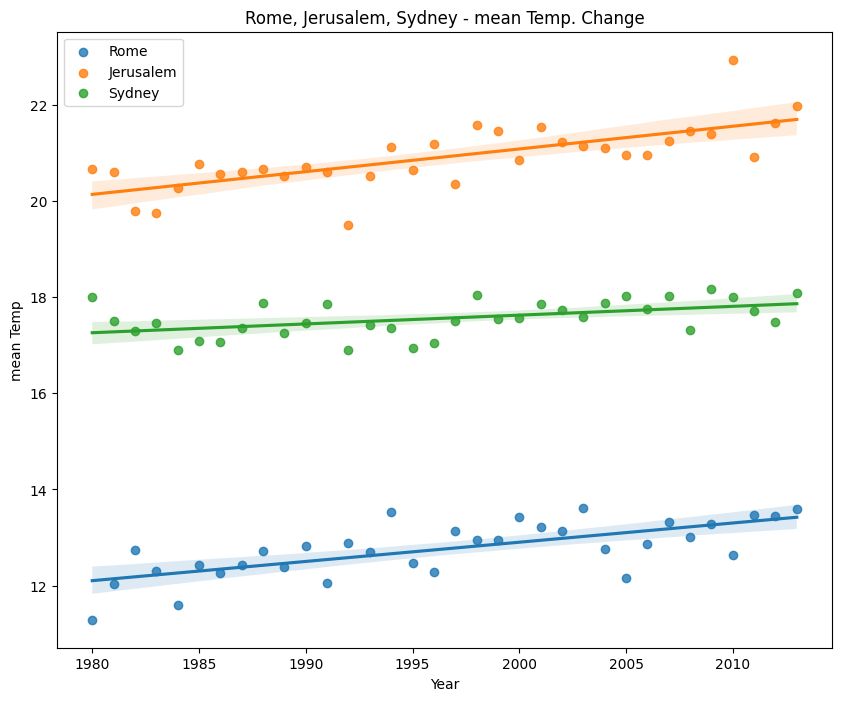

In [69]:
value = 'mean'
plt.figure(figsize=(10,8))
sb.regplot(data=temp_desc[temp_desc.City == c1], x='year', y=value, label=c1)
sb.regplot(data=temp_desc[temp_desc.City == c2], x='year', y=value, label=c2)
sb.regplot(data=temp_desc[temp_desc.City == c3], x='year', y=value, label=c3)
plt.title(f'{c1}, {c2}, {c3} - {value} Temp. Change')
plt.legend()
plt.xlabel('Year')
plt.ylabel(value + ' Temp')
plt.show()

In [70]:
temp_desc['prev_mean_temp'] = (temp_desc.sort_values('year').groupby('City')['mean'].shift(1))
temp_desc['mean_temp_change'] = (temp_desc['mean'] - temp_desc['prev_mean_temp'])

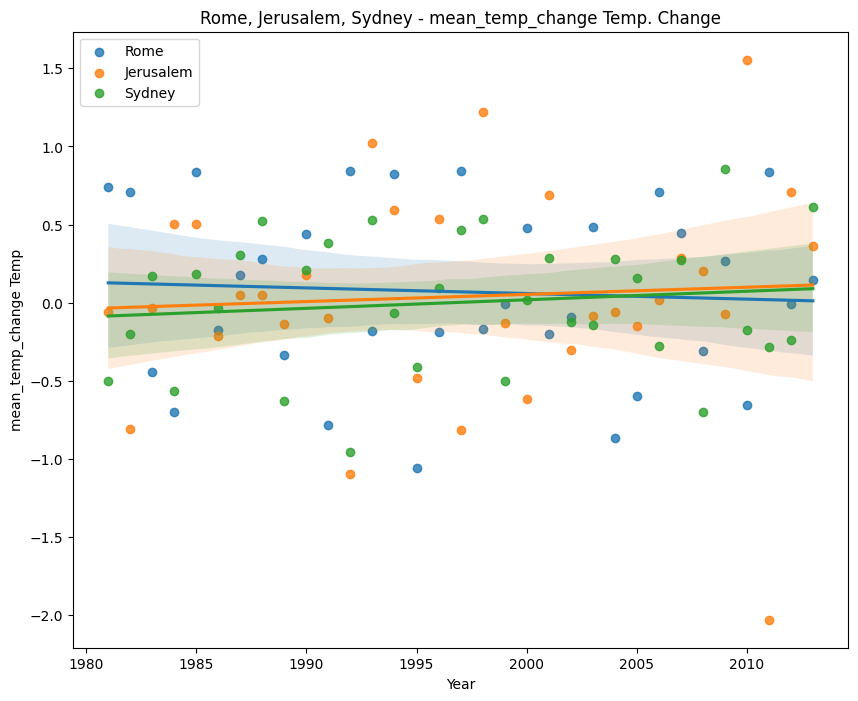

In [71]:
value = 'mean_temp_change'
plt.figure(figsize=(10,8))
sb.regplot(data=temp_desc[temp_desc.City == c1], x='year', y=value, label=c1)
sb.regplot(data=temp_desc[temp_desc.City == c2], x='year', y=value, label=c2)
sb.regplot(data=temp_desc[temp_desc.City == c3], x='year', y=value, label=c3)
plt.title(f'{c1}, {c2}, {c3} - {value} Temp. Change')
plt.legend()
plt.xlabel('Year')
plt.ylabel(value + ' Temp')
plt.show()

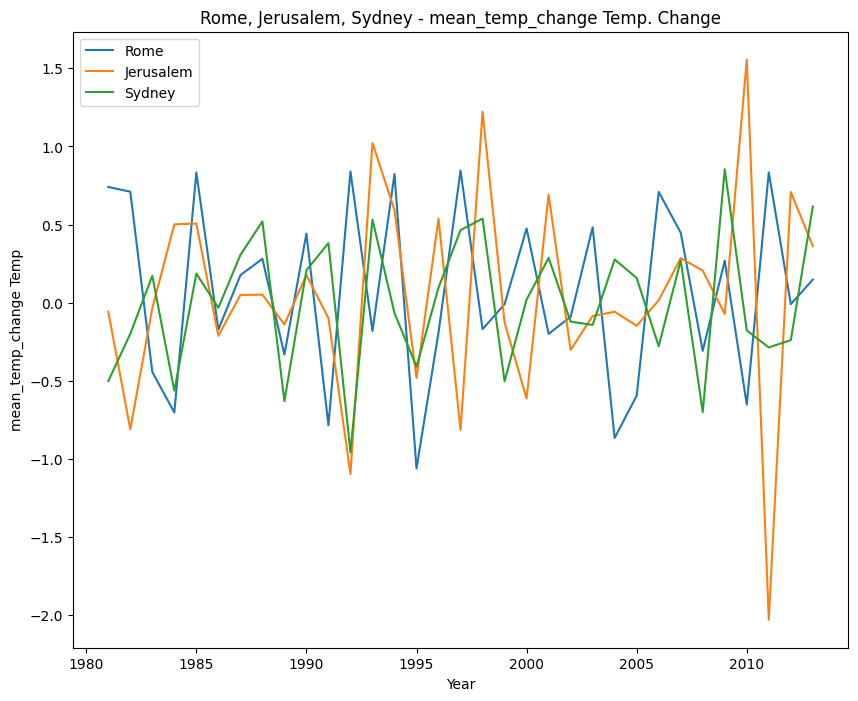

In [72]:
value = 'mean_temp_change'
plt.figure(figsize=(10,8))
sb.lineplot(data=temp_desc[temp_desc.City == c1], x='year', y=value, label=c1)
sb.lineplot(data=temp_desc[temp_desc.City == c2], x='year', y=value, label=c2)
sb.lineplot(data=temp_desc[temp_desc.City == c3], x='year', y=value, label=c3)
plt.title(f'{c1}, {c2}, {c3} - {value} Temp. Change')
plt.legend()
plt.xlabel('Year')
plt.ylabel(value + ' Temp')
plt.show()